# Hough变换
Hough变换通过把图形中可能出现模式的某些像素点变换到参数空间中，然后在参数空间对出现的模式进行积累，超过一定阈值就判断为该模式在图形空间中存在。因此理论上讲所有可以使用参数表示的模式都可以使用Hough变换进行检测。
比如直线段的检测。一个直线可以表示为$y=ax+b$，这里的$a$和$b$就是参数，把可能出现模式的像素点$(x_0, y_0)$转换到$(a,b)$参数空间中，那么在参数空间中就是穿过这个点的一条直线。如果有参数为$(a_0, b_0)$为参数的一条直线在原空间中存在，那么在参数空间中对应的直线会在此参数位置交汇，再通过voting就可以确定其是否存在。
## Circular Hough Transform OpenCV API
Opencv中给出了CHT的api，其调用格式为：
`cv2.HoughCircles(image, method, dp, minDist)`其中：
- `image`为8位的灰度图片
- `method`为实现方法，虽然设置了这个参数，但目前唯一的实现方法就是`cv2.HOUGH_GRADIENT`
- `dp`用来调整积累器（或者叫voting）的累加速率，它的值越大，积累的值越小
- `minDist`是检测到的圆圆心之间的最小距离
其输出变量为`circles`，其中每个基本元素是包含三个或者四个元素的向量，其格式为`(x, y, radius, votes)`，前两个为圆的圆心，第三个为半径。
以下以一个简单的几何图形为例说明opencv的API的使用方法

In [8]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt

image = cv.imread('./raw/hough_transform/olympics.jpg')
output = image.copy()
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1.2, 100)
print(circles)
circles.astype(int)

[[[1419.       421.80002  225.12001]
  [ 395.40002  421.80002  224.04001]
  [ 906.60004  424.2      227.04001]
  [ 653.4      601.80005  223.56001]
  [1162.2001   598.2      183.6    ]]]


array([[[1419,  421,  225],
        [ 395,  421,  224],
        [ 906,  424,  227],
        [ 653,  601,  223],
        [1162,  598,  183]]])

In [9]:
def process_result(circles, img):
    
    if circles is not None:
        circles = np.round(circles[0, :, :]).astype("int")
        
        for (x, y, r) in circles:
            cv.circle(img, (x, y), r, (0, 255, 0), 4)
            cv.rectangle(img, (x-5, y-5), (x+5, y+5), (0, 128, 255), -1)

    plt.imshow(img)

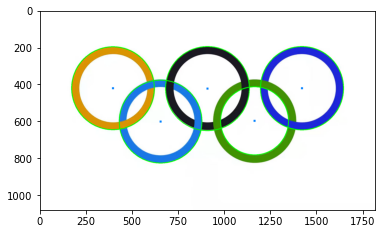

In [10]:
process_result(circles, image)

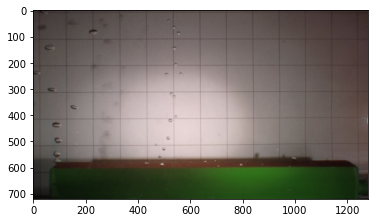

In [16]:
image = cv.imread('./raw/hough_transform/segment01_03.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 100)

process_result(circles, image)